In [1]:
# 라이브러리 저장
# !pip freeze > requirements.txt

In [2]:
# 라이브러리 실행
# !pip install -r requirements.txt
!pip install tensorflow==2.10.0

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings(action='ignore')
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
train = pd.read_excel('mental_health_medical_data.xlsx')
test = pd.read_excel('mental_health_medical_data_test.xlsx')

In [3]:
def listing(x):
    x = eval(x)
    return x
# 문자열 벗기기\n"
train['symptoms'] = train['symptoms'].apply(listing)
test['symptoms'] = test['symptoms'].apply(listing)

In [4]:
# 테스트 데이터 랜덤 샘플링.
test

,Unnamed: 0,disease,symptoms,department
0,1.0,경계성 인격장애,[의심],정신건강의학과
1,NaN,경계성 인격장애,"[의심, 약물남용]",NaN
2,NaN,경계성 인격장애,"[의심, 약물남용, 대인관계 어려움, 조절할 수 없는 충동감]",NaN
3,NaN,경계성 인격장애,"[의심, 약물남용, 대인관계 어려움, 조절할 수 없는 충동감, 자살의 위험, 우울,...",NaN


In [5]:
train

,Unnamed: 0,disease,symptoms,department
0,0,강박 장애,"[불안, 반복적인 동작, 의심]",정신건강의학과
1,1,경계성 인격장애,"[의심, 약물남용, 대인관계 어려움, 조절할 수 없는 충동감, 자살의 위험, 우울,...",정신건강의학과
2,2,공황 장애,"[숨막히는 느낌, 얼굴이 화끈거림, 가슴 통증, 죽음에 대한 공포, 어지러움, 발한...",정신건강의학과
3,3,금단 현상,"[복시, 손떨림, 고혈압, 서맥, 저혈압, 청색증, 불안, 기운없음, 불면증, 두통...",정신건강의학과
4,4,분열정동 장애,"[와해된 언어, 피해망상, 환각, 환시, 환청, 와해된 행동, 망상, 이상행동]",정신건강의학과
...,...,...,...,...
59,59,혈관성 치매,"[언어장애, 인지장애, 감각 이상, 마비]",정신건강의학과
60,60,히스테리성 인격장애,[],정신건강의학과
61,61,레트 증후군,"[상동적 행동, 인지장애, 운동장애, 정신 지체]",정신건강의학과
62,62,폐소공포증,"[불안, 좁은 공간에서의 불안감]",정신건강의학과


In [6]:
#레이블 인코딩(타겟 문자열 불가)
from sklearn.preprocessing import LabelEncoder
items = train['disease']
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [ 0  2  3  6 22 23 24 35 36 37 39 41 43 47 51 52 59  1  5  7  8  9 10 12
 13 14 15 16 17 18 19 20 21 25 26 27 28 29 30 31 32 33 34 38 40 42 44 45
 46 48 49 50 53 54 55 56 57 60 61 62 63 11 58  4]


In [7]:
train

,Unnamed: 0,disease,symptoms,department
0,0,강박 장애,"[불안, 반복적인 동작, 의심]",정신건강의학과
1,1,경계성 인격장애,"[의심, 약물남용, 대인관계 어려움, 조절할 수 없는 충동감, 자살의 위험, 우울,...",정신건강의학과
2,2,공황 장애,"[숨막히는 느낌, 얼굴이 화끈거림, 가슴 통증, 죽음에 대한 공포, 어지러움, 발한...",정신건강의학과
3,3,금단 현상,"[복시, 손떨림, 고혈압, 서맥, 저혈압, 청색증, 불안, 기운없음, 불면증, 두통...",정신건강의학과
4,4,분열정동 장애,"[와해된 언어, 피해망상, 환각, 환시, 환청, 와해된 행동, 망상, 이상행동]",정신건강의학과
...,...,...,...,...
59,59,혈관성 치매,"[언어장애, 인지장애, 감각 이상, 마비]",정신건강의학과
60,60,히스테리성 인격장애,[],정신건강의학과
61,61,레트 증후군,"[상동적 행동, 인지장애, 운동장애, 정신 지체]",정신건강의학과
62,62,폐소공포증,"[불안, 좁은 공간에서의 불안감]",정신건강의학과


In [8]:
X_train = np.array([x for x in train['symptoms']])
y_train = np.array(labels)# 

X_test = np.array([x for x in test['symptoms']])

In [9]:
X_test

array([list(['의심']), list(['의심', '약물남용']),
       list(['의심', '약물남용', '대인관계 어려움', '조절할 수 없는 충동감']),
       list(['의심', '약물남용', '대인관계 어려움', '조절할 수 없는 충동감', '자살의 위험', '우울', '망상'])],
      dtype=object)

In [10]:
X_train[0]

['불안', '반복적인 동작', '의심']

# **모델링**

In [11]:
#파라미터 설정
vocab_size = 177
embedding_dim = 8 # 임베딩 차원
max_length = 17      # 증상 최대 개수 
padding_type='post'

In [12]:
#tokenizer에 fit
tokenizer = Tokenizer(num_words = vocab_size)#, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index


In [13]:
#데이터를 sequence로 변환해주고 padding 해줍니다.
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, padding=padding_type, maxlen=max_length)

In [14]:
test_padded

array([[17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [17, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [17, 29,  4, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [17, 29,  4, 18, 30,  2,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0]])

In [15]:
#가벼운 NLP모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(64, activation='softmax')
])

In [16]:
# compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 17, 8)             1416      
                                                                 
 global_average_pooling1d (G  (None, 8)                0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                216       
                                                                 
 dense_1 (Dense)             (None, 64)                1600      
                                                                 
Total params: 3,232
Trainable params: 3,232
Non-trainable params: 0
_________________________________________________________________
None


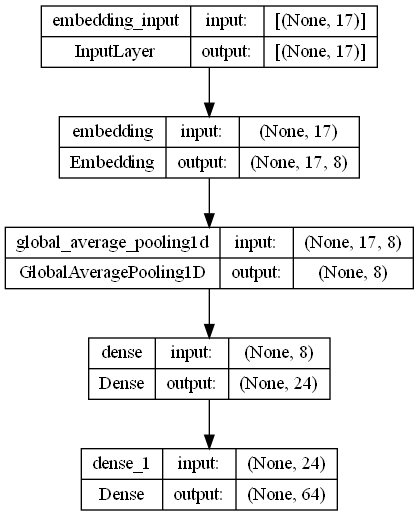

In [17]:
from keras import layers, models
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

In [48]:
# fit model
num_epochs = 20
history = model.fit(train_padded, y_train, 
                    epochs=1000, verbose=2)
# history = model.fit(train_padded, y_train, 
#                     epochs=num_epochs, verbose=2, 
#                     validation_split=0.2)

Epoch 1/1000
2/2 - 0s - loss: 4.1597 - accuracy: 0.0156 - 359ms/epoch - 180ms/step
Epoch 2/1000
2/2 - 0s - loss: 4.1588 - accuracy: 0.0156 - 2ms/epoch - 982us/step
Epoch 3/1000
2/2 - 0s - loss: 4.1584 - accuracy: 0.0156 - 2ms/epoch - 997us/step
Epoch 4/1000
2/2 - 0s - loss: 4.1580 - accuracy: 0.0156 - 2ms/epoch - 997us/step
Epoch 5/1000
2/2 - 0s - loss: 4.1577 - accuracy: 0.0156 - 996us/epoch - 498us/step
Epoch 6/1000
2/2 - 0s - loss: 4.1574 - accuracy: 0.0156 - 2ms/epoch - 997us/step
Epoch 7/1000
2/2 - 0s - loss: 4.1570 - accuracy: 0.0156 - 2ms/epoch - 998us/step
Epoch 8/1000
2/2 - 0s - loss: 4.1567 - accuracy: 0.0156 - 2ms/epoch - 997us/step
Epoch 9/1000
2/2 - 0s - loss: 4.1564 - accuracy: 0.0156 - 2ms/epoch - 997us/step
Epoch 10/1000
2/2 - 0s - loss: 4.1560 - accuracy: 0.0156 - 2ms/epoch - 997us/step
Epoch 11/1000
2/2 - 0s - loss: 4.1557 - accuracy: 0.0156 - 2ms/epoch - 997us/step
Epoch 12/1000
2/2 - 0s - loss: 4.1554 - accuracy: 0.0156 - 2ms/epoch - 997us/step
Epoch 13/1000
2/2 - 0

In [49]:
# 여기 부분의 train_padded 부분을 새로운 데이터 셋을 생성해주면 됨
y_prob = model.predict(test_padded, verbose=0) 
predicted = y_prob.argmax(axis=-1)
# 그리고 n번의 질문 역시도 이것을 바탕으로 진행됨

# 모델이 여러번 사용될 예정

print("학습용으로 다시 예측해봄")

encoder.classes_[predicted]

학습용으로 다시 예측해봄


array(['강박 장애', '경계성 인격장애', '신경성 폭식증', '아스퍼거 증후군', '알코올 의존성'],
      dtype=object)

In [50]:
# 질병 라벨링 순서
print(encoder.classes_)

['강박 장애' '건강염려증' '경계성 인격장애' '공황 장애' '과호흡 증후군' '광장공포증' '금단 현상' '기분부전증'
 '난독증' '뇌경색' '뚜렛 증후군' '레트 증후군' '말더듬이' '망상 장애' '뮌하우젠 증후군' '반사회성 인격장애'
 '반응성 애착장애' '발모벽' '베르니케 코시코프 증후군' '병적 도벽' '병적 방화' '분리 불안 장애' '분열정동 장애'
 '불면증' '불안 장애' '사회공포증' '산후 우울증' '섬망' '섭식 장애' '성도착증' '성인 주의력 결핍 과잉행동장애'
 '소아청소년기 우울증' '수면 무호흡증' '수면 장애' '수면보행증' '신경성 식욕부진증' '신경성 폭식증' '신체형 장애'
 '실어증' '아스퍼거 증후군' '알츠하이머병' '알코올 의존성' '알코올성 치매' '양극성 장애' '얼렌 증후군'
 '외상 후 스트레스 장애' '외상성 치매' '우울증' '의상도착증' '인터넷 중독' '자폐증 / 자폐 스펙트럼 장애' '적응 장애'
 '조현병' '주의력결핍 과잉행동장애' '지적장애' '치매' '틱 장애' '편집성 인격장애' '폐소공포증' '하지불안증후군'
 '해리 장애' '행동 및 충동 장애' '혈관성 치매' '히스테리성 인격장애']
